# Marital Status Classification (Married vs. Unmarried)

In [4]:
# import packages
import sklearn
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(16)

In [5]:
# load data
csv_file = "~/IDC5210_Machine_Learning/Project/Translated_data/demographics_w_regions.csv"
marriage_df = pd.read_csv(csv_file)
marriage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103202 entries, 0 to 103201
Data columns (total 33 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      103202 non-null  int64  
 1   field_1         103202 non-null  int64  
 2   Cust_ID         103202 non-null  int64  
 3   Cust_Segment    103202 non-null  object 
 4   Branch_ID       103202 non-null  int64  
 5   Branch_Y        103202 non-null  float64
 6   Branch_X        103202 non-null  float64
 7   Home_Loc_Y      103198 non-null  float64
 8   Home_Loc_X      103198 non-null  float64
 9   Work_Loc_Y      103202 non-null  float64
 10  Work_Loc_X      103202 non-null  float64
 11  Gender          103202 non-null  object 
 12  Marital_Status  103202 non-null  object 
 13  Education_Lv    103202 non-null  object 
 14  Job_Status      103202 non-null  object 
 15  Income          100752 non-null  float64
 16  Age             103202 non-null  int64  
 17  Years_w_Ba

In [7]:
# drop unnecessary columns
marriage_df.drop(["Unnamed: 0", "field_1", "Branch_X", "Branch_Y", "Home_Loc_X", "Home_Loc_Y", "Work_Loc_X", "Work_Loc_Y"], axis = 1, inplace=True)
marriage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103202 entries, 0 to 103201
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Cust_ID         103202 non-null  int64  
 1   Cust_Segment    103202 non-null  object 
 2   Branch_ID       103202 non-null  int64  
 3   Gender          103202 non-null  object 
 4   Marital_Status  103202 non-null  object 
 5   Education_Lv    103202 non-null  object 
 6   Job_Status      103202 non-null  object 
 7   Income          100752 non-null  float64
 8   Age             103202 non-null  int64  
 9   Years_w_Bank    103197 non-null  float64
 10  Penalty_201407  103202 non-null  object 
 11  Penalty_201408  103202 non-null  object 
 12  Penalty_201409  103202 non-null  object 
 13  Penalty_201410  103202 non-null  object 
 14  Penalty_201411  103202 non-null  object 
 15  Penalty_201412  103202 non-null  object 
 16  Penalty_201501  103202 non-null  object 
 17  Penalty_20

In [8]:
# count risk types per row
risk_counts = marriage_df.iloc[:,10:22].apply(pd.Series.value_counts, axis=1)
risk_counts = risk_counts.fillna(0)

In [9]:
risk_counts

,.,1)RISKSIZ,2)GECIKME 1-15 GUN,3)GECIKME 16-29 GUN,4)GECIKME 30-59 GUN,5)GECIKME 60+ GUN,6)TAKIP
0,1.0,5.0,5.0,0.0,1.0,0.0,0.0
1,0.0,7.0,5.0,0.0,0.0,0.0,0.0
2,0.0,10.0,0.0,0.0,2.0,0.0,0.0
3,0.0,5.0,1.0,0.0,1.0,2.0,3.0
4,0.0,12.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
103197,0.0,12.0,0.0,0.0,0.0,0.0,0.0
103198,0.0,9.0,3.0,0.0,0.0,0.0,0.0
103199,8.0,4.0,0.0,0.0,0.0,0.0,0.0
103200,0.0,12.0,0.0,0.0,0.0,0.0,0.0


In [10]:
marriage_df = marriage_df.join(risk_counts)
marriage_df

,Cust_ID,Cust_Segment,Branch_ID,Gender,Marital_Status,Education_Lv,Job_Status,Income,Age,Years_w_Bank,...,Work_Region,Home_Region,Branch_Region,.,1)RISKSIZ,2)GECIKME 1-15 GUN,3)GECIKME 16-29 GUN,4)GECIKME 30-59 GUN,5)GECIKME 60+ GUN,6)TAKIP
0,25139695,BİREYSEL,2,E,EVLİ,LİSE,ÜCRETLİ (ÖZEL),2500.0,55,2.0,...,MARMARA,MEDITERRANEAN,MEDITERRANEAN,1.0,5.0,5.0,0.0,1.0,0.0,0.0
1,21213035,BİREYSEL,2,E,BİLINMİYOR,LİSE,ÜCRETLİ (ÖZEL),2500.0,24,4.0,...,MARMARA,MEDITERRANEAN,MEDITERRANEAN,0.0,7.0,5.0,0.0,0.0,0.0,0.0
2,23187800,BİREYSEL,2,E,EVLİ,LİSE,ÜCRETLİ (ÖZEL),850.0,39,3.0,...,MARMARA,MARMARA,MEDITERRANEAN,0.0,10.0,0.0,0.0,2.0,0.0,0.0
3,16400475,BİREBİR,2,E,EVLİ,ÜNİVERSİTE,SERBEST MESLEK,NaN,45,8.0,...,MARMARA,MARMARA,MEDITERRANEAN,0.0,5.0,1.0,0.0,1.0,2.0,3.0
4,17303354,BİREYSEL,2,E,EVLİ,LİSE,ÜCRETLİ (ÖZEL),3500.0,35,7.0,...,MARMARA,MEDITERRANEAN,MEDITERRANEAN,0.0,12.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103197,9274456,BİREBİR,1228,E,EVLİ,ÜNİVERSİTE,ÜCRETLİ (ÖZEL),0.0,54,13.0,...,MEDITERRANEAN,MARMARA,MEDITERRANEAN,0.0,12.0,0.0,0.0,0.0,0.0,0.0
103198,9316496,BİREYSEL,1261,E,EVLİ,ÜNİVERSİTE,ÜCRETLİ (ÖZEL),1044.0,31,13.0,...,MARMARA,MARMARA,MARMARA,0.0,9.0,3.0,0.0,0.0,0.0,0.0
103199,25988134,BİREYSEL,1308,E,BEKAR,LİSE,ÜCRETLİ (ÖZEL),1600.0,20,1.0,...,MARMARA,MARMARA,MARMARA,8.0,4.0,0.0,0.0,0.0,0.0,0.0
103200,7745674,BİREYSEL,1359,K,EVLİ,ÜNİVERSİTE,ÜCRETLİ (ÖZEL),0.0,35,14.0,...,MEDITERRANEAN,MARMARA,MEDITERRANEAN,0.0,12.0,0.0,0.0,0.0,0.0,0.0


In [11]:
marriage_df.drop(['.','Penalty_201407', 'Penalty_201408', 'Penalty_201409', 
                  'Penalty_201410', 'Penalty_201411', 'Penalty_201412', 'Penalty_201501',
                  'Penalty_201502', 'Penalty_201503', 'Penalty_201504', 'Penalty_201505', 
                  'Penalty_201506'], axis = 1, inplace=True)

In [12]:
marriage_df

,Cust_ID,Cust_Segment,Branch_ID,Gender,Marital_Status,Education_Lv,Job_Status,Income,Age,Years_w_Bank,Work_Region,Home_Region,Branch_Region,1)RISKSIZ,2)GECIKME 1-15 GUN,3)GECIKME 16-29 GUN,4)GECIKME 30-59 GUN,5)GECIKME 60+ GUN,6)TAKIP
0,25139695,BİREYSEL,2,E,EVLİ,LİSE,ÜCRETLİ (ÖZEL),2500.0,55,2.0,MARMARA,MEDITERRANEAN,MEDITERRANEAN,5.0,5.0,0.0,1.0,0.0,0.0
1,21213035,BİREYSEL,2,E,BİLINMİYOR,LİSE,ÜCRETLİ (ÖZEL),2500.0,24,4.0,MARMARA,MEDITERRANEAN,MEDITERRANEAN,7.0,5.0,0.0,0.0,0.0,0.0
2,23187800,BİREYSEL,2,E,EVLİ,LİSE,ÜCRETLİ (ÖZEL),850.0,39,3.0,MARMARA,MARMARA,MEDITERRANEAN,10.0,0.0,0.0,2.0,0.0,0.0
3,16400475,BİREBİR,2,E,EVLİ,ÜNİVERSİTE,SERBEST MESLEK,NaN,45,8.0,MARMARA,MARMARA,MEDITERRANEAN,5.0,1.0,0.0,1.0,2.0,3.0
4,17303354,BİREYSEL,2,E,EVLİ,LİSE,ÜCRETLİ (ÖZEL),3500.0,35,7.0,MARMARA,MEDITERRANEAN,MEDITERRANEAN,12.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103197,9274456,BİREBİR,1228,E,EVLİ,ÜNİVERSİTE,ÜCRETLİ (ÖZEL),0.0,54,13.0,MEDITERRANEAN,MARMARA,MEDITERRANEAN,12.0,0.0,0.0,0.0,0.0,0.0
103198,9316496,BİREYSEL,1261,E,EVLİ,ÜNİVERSİTE,ÜCRETLİ (ÖZEL),1044.0,31,13.0,MARMARA,MARMARA,MARMARA,9.0,3.0,0.0,0.0,0.0,0.0
103199,25988134,BİREYSEL,1308,E,BEKAR,LİSE,ÜCRETLİ (ÖZEL),1600.0,20,1.0,MARMARA,MARMARA,MARMARA,4.0,0.0,0.0,0.0,0.0,0.0
103200,7745674,BİREYSEL,1359,K,EVLİ,ÜNİVERSİTE,ÜCRETLİ (ÖZEL),0.0,35,14.0,MEDITERRANEAN,MARMARA,MEDITERRANEAN,12.0,0.0,0.0,0.0,0.0,0.0


In [13]:
csv_file2 = "~/IDC5210_Machine_Learning/Project/Translated_data/transactions(SU_ORNEKLEM_KK_HAR_BILGI).csv"
transactions = pd.read_csv(csv_file2, dtype={'Category': 'str'})
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9334625 entries, 0 to 9334624
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   Cust_ID         int64  
 2   Trans_Data      object 
 3   Trans_Time      object 
 4   Trans_Amt       float64
 5   Category        object 
 6   Merchant_ID     int64  
 7   Online_Trans    int64  
 8   Trans_Type      object 
 9   Trans_Currency  object 
 10  X               float64
 11  Y               float64
dtypes: float64(3), int64(4), object(5)
memory usage: 854.6+ MB


In [14]:
trans_sub = transactions[['Cust_ID', 'Category', 'Trans_Amt', 'Online_Trans']]
trans_sub

,Cust_ID,Category,Trans_Amt,Online_Trans
0,11861396,RESTORAN,10.57,0
1,13667756,RESTORAN,82.00,0
2,11024865,RESTORAN,15.00,0
3,10922788,RESTORAN,86.00,0
4,10335987,RESTORAN,30.00,0
...,...,...,...,...
9334620,15623192,GIDA,23.50,0
9334621,16382137,TEKSTİL,115.00,0
9334622,16808133,HİZMET SEKTÖRLERİ,32.00,0
9334623,27012943,TEKSTİL,250.00,0


# Columnize categories and assign values to cust_id in index, then join to demographics df

In [15]:
trans_sums = trans_sub.groupby(['Cust_ID', 'Category'])['Trans_Amt'].sum().reset_index()
trans_cats = trans_sums.pivot(columns='Category', index='Cust_ID', values='Trans_Amt')
trans_cats = trans_cats.fillna(0)

In [16]:
trans_cats

Category,AKARYAKIT,ALIŞVERİŞ MERKEZLERİ,ARABA KİRALAMA,AYAKKABI,BEYAZ EŞYA,"DENİZ TAŞITLARI KİRALAMA, SATIŞ, BAKIM",DOĞRUDAN PAZARLAMA-MAIL ORDER,DİĞER,EĞLENCE VE SPOR,EĞİTİM,...,SEYAHAT ACENTALARI - TAŞIMACILIK,SPOR GİYİM,SİGORTA,SİGORTA-MAIL ORDER,SİNEMA TİYATRO SANAT,TEKNOLOJİ,TEKSTİL,TELEKOMÜNİKASYON,"YAPI MALZ., HIRDAVAT, NALBURİYE",İÇKİLİ YERLER - KUMARHANE
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1560993,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0
1566513,2170.00,20.05,0.0,0.00,250.0,0.0,0.0,268.50,0.0,0.0,...,0.00,0.00,0.0,858.00,0.0,2238.76,0.00,1375.0,1928.13,0.0
1567711,375.32,0.00,0.0,558.40,55.0,0.0,0.0,350.92,0.0,0.0,...,716.87,89.90,0.0,465.39,0.0,77.57,5587.22,912.6,64.93,70.0
1569761,0.00,0.00,0.0,459.87,0.0,0.0,0.0,0.00,0.0,0.0,...,1590.00,59.99,0.0,0.00,0.0,8797.33,1319.34,0.0,3026.21,0.0
1569938,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,379.00,19.90,840.0,74.85,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28196275,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,55.25,0.00,0.0,0.00,0.0
28196280,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,229.90,0.0
28200516,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,5338.26,0.00,0.0,0.00,0.0


In [17]:
marriage_df = marriage_df.join(trans_cats, on='Cust_ID')

In [18]:
marriage_df.drop('Cust_ID', axis = 1, inplace = True)

In [19]:
marriage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103202 entries, 0 to 103201
Data columns (total 53 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Cust_Segment                            103202 non-null  object 
 1   Branch_ID                               103202 non-null  int64  
 2   Gender                                  103202 non-null  object 
 3   Marital_Status                          103202 non-null  object 
 4   Education_Lv                            103202 non-null  object 
 5   Job_Status                              103202 non-null  object 
 6   Income                                  100752 non-null  float64
 7   Age                                     103202 non-null  int64  
 8   Years_w_Bank                            103197 non-null  float64
 9   Work_Region                             103202 non-null  object 
 10  Home_Region                             1031

## Data Exploration

In [20]:
marriage_df['Cust_Segment'].value_counts()

BİREYSEL                       96149
BİREBİR                         4000
MİKRO                           2830
EXI26                            130
ÖZEL BANKACILIK MÜŞTERİLERİ       93
Name: Cust_Segment, dtype: int64

In [21]:
marriage_df['Marital_Status'].value_counts()

EVLİ                65637
BEKAR               30877
BOŞANMIŞ             4831
BİLINMİYOR           1397
DUL                   457
EVLİLİĞİN İPTALİ        3
Name: Marital_Status, dtype: int64

In [22]:
marriage_df['Education_Lv'].value_counts()

LİSE          46808
ÜNİVERSİTE    26854
ORTAOKUL       8735
YÜKSEKOKUL     8090
İLKOKUL        7583
LİSANSÜSTÜ     3520
EĞİTİMSİZ      1312
DOKTORA         217
BİLİNMİYOR       83
Name: Education_Lv, dtype: int64

In [23]:
marriage_df['Job_Status'].value_counts()

ÜCRETLİ (ÖZEL)                    78467
SERBEST MESLEK                    11056
ÜCRETLI (KAMU)                     5342
EMEKLİ                             3403
ÇALIŞAN EMEKLİ(ÜCRETLİ)            1997
EV HANIMI                           785
ÇALIŞMIYOR                          705
ÇALIŞAN EMEKLİ(SERBEST MESLEK)      591
DİĞER                               455
TANIMSIZ                            225
ÖĞRENCİ                             165
YURTDIŞINDA ÇALIŞAN                   8
ÇOCUK (18 YAŞIN ALTINDA)              3
Name: Job_Status, dtype: int64

In [24]:
marriage_df['Home_Region'].value_counts()

MARMARA             100587
BLACK SEA              671
CENTRAL ANATOLIA       494
MEDITERRANEAN          468
AEGEAN                 377
EASTERN ANATOLIA       333
SE ANATOLIA            268
Name: Home_Region, dtype: int64

In [25]:
marriage_df['Work_Region'].value_counts()

MARMARA             101824
CENTRAL ANATOLIA       353
AEGEAN                 316
BLACK SEA              255
MEDITERRANEAN          200
EASTERN ANATOLIA       144
SE ANATOLIA            110
Name: Work_Region, dtype: int64

In [26]:
marriage_df['Branch_Region'].value_counts()

MARMARA             98475
BLACK SEA            1118
CENTRAL ANATOLIA     1100
AEGEAN               1089
MEDITERRANEAN         713
EASTERN ANATOLIA      380
SE ANATOLIA           323
Name: Branch_Region, dtype: int64

In [27]:
# check values for nulls
marriage_df.isnull().sum(axis = 0)

Cust_Segment                                 0
Branch_ID                                    0
Gender                                       0
Marital_Status                               0
Education_Lv                                 0
Job_Status                                   0
Income                                    2450
Age                                          0
Years_w_Bank                                 5
Work_Region                                  0
Home_Region                                  4
Branch_Region                                4
1)RISKSIZ                                    0
2)GECIKME 1-15 GUN                           0
3)GECIKME 16-29 GUN                          0
4)GECIKME 30-59 GUN                          0
5)GECIKME 60+ GUN                            0
6)TAKIP                                      0
AKARYAKIT                                 1345
ALIŞVERİŞ MERKEZLERİ                      1345
ARABA KİRALAMA                            1345
AYAKKABI     

In [28]:
marriage_df[marriage_df['DİĞER'].isnull()]
#looks like these customers didn't have transaction data or did not use their credit cards

,Cust_Segment,Branch_ID,Gender,Marital_Status,Education_Lv,Job_Status,Income,Age,Years_w_Bank,Work_Region,...,SEYAHAT ACENTALARI - TAŞIMACILIK,SPOR GİYİM,SİGORTA,SİGORTA-MAIL ORDER,SİNEMA TİYATRO SANAT,TEKNOLOJİ,TEKSTİL,TELEKOMÜNİKASYON,"YAPI MALZ., HIRDAVAT, NALBURİYE",İÇKİLİ YERLER - KUMARHANE
138,BİREYSEL,4,E,EVLİ,ÜNİVERSİTE,ÜCRETLİ (ÖZEL),1700.0,29,8.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,MİKRO,4,E,BİLINMİYOR,ÜNİVERSİTE,SERBEST MESLEK,25000.0,36,13.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,BİREYSEL,4,K,BOŞANMIŞ,LİSE,ÜCRETLİ (ÖZEL),1215.0,31,3.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481,BİREYSEL,7,E,EVLİ,LİSE,ÜCRETLİ (ÖZEL),2300.0,40,14.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
614,BİREYSEL,13,E,EVLİ,LİSE,ÜCRETLİ (ÖZEL),2000.0,38,7.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102793,BİREYSEL,685,E,BEKAR,ÜNİVERSİTE,ÜCRETLI (KAMU),0.0,24,1.0,AEGEAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102835,BİREYSEL,822,E,EVLİ,LİSE,ÜCRETLİ (ÖZEL),1500.0,25,6.0,AEGEAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103008,BİREYSEL,232,E,BEKAR,YÜKSEKOKUL,ÜCRETLİ (ÖZEL),2500.0,25,4.0,BLACK SEA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103063,BİREYSEL,532,E,EVLİ,LİSE,ÜCRETLİ (ÖZEL),1000.0,37,6.0,BLACK SEA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
marriage_df.dropna(subset=["AKARYAKIT"], inplace=True)
marriage_df.dropna(subset=["Home_Region"], inplace=True)
marriage_df.dropna(subset=["Branch_Region"], inplace=True)

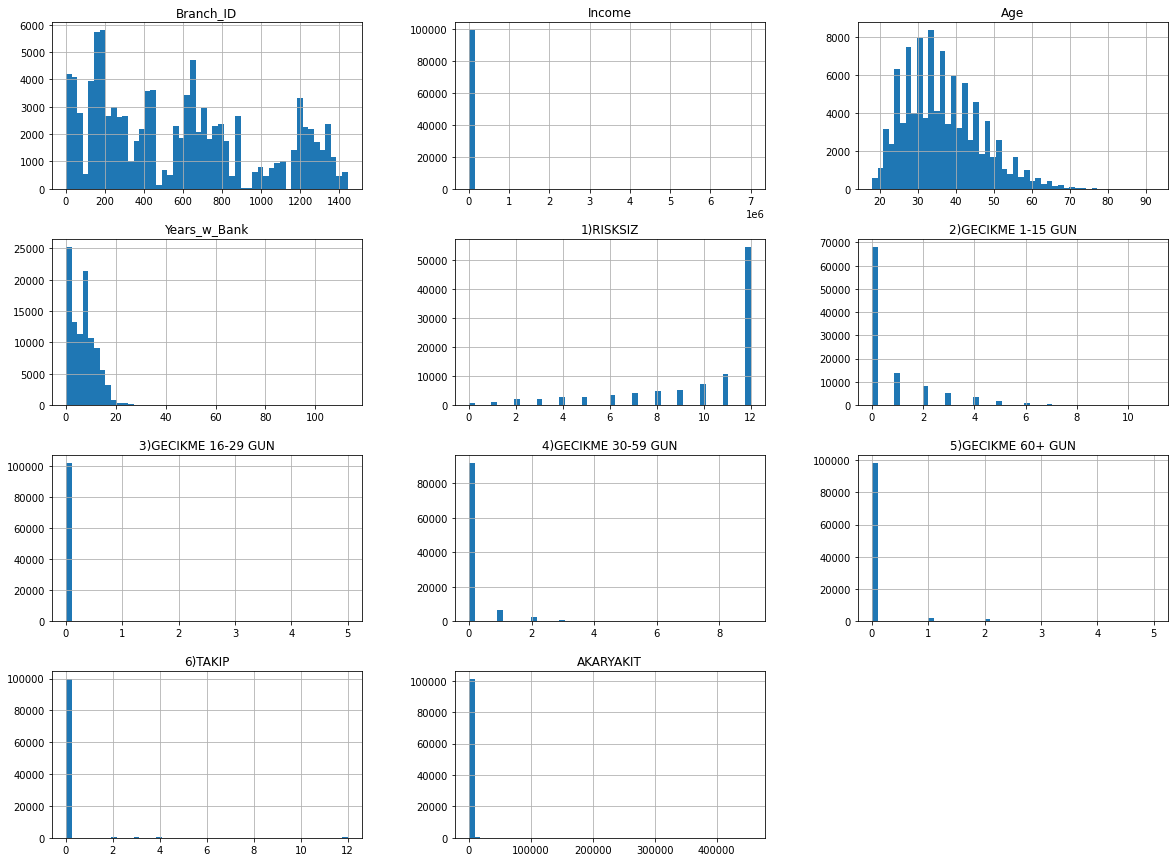

In [30]:
# Data Exploration
%matplotlib inline
import matplotlib.pyplot as plt
marriage_df.iloc[:,0:19].hist(bins=50, figsize=(20,15))
plt.show()

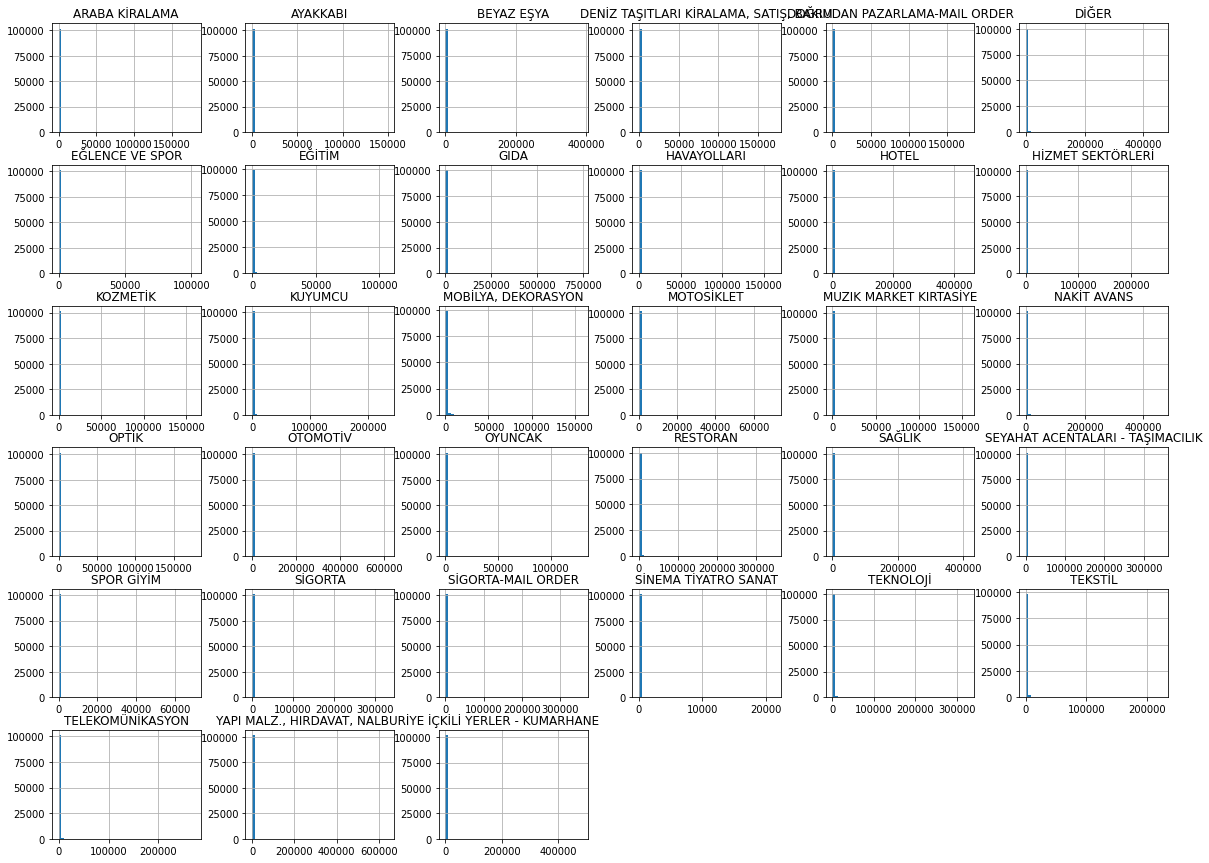

In [31]:
marriage_df.iloc[:,20:].hist(bins=50, figsize=(20,15))
plt.show()

## Data Processing

In [32]:
#train/test split
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(marriage_df, test_size = 0.2, random_state = 16)

In [33]:
# separate labels from feature matrix
train_y = train_set['Marital_Status']
train_X = train_set.drop('Marital_Status', axis = 1)
# test_y = test_set['Marital_Status']
# test_X = test_set.drop('Marital_Status', axis = 1)

In [34]:
#pipeline

# locations, gender, marital status, education level, job status, penalties
# Additional processing with full data set: drop home region branch region nulls

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('std_scaler', StandardScaler())
])

In [35]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline  = Pipeline([
('cat_encoder', OneHotEncoder())
])

In [36]:
from sklearn.compose import ColumnTransformer
num_attribs = ['Branch_ID', 'Income', 'Age', 'Years_w_Bank']
cat_attribs = ['Cust_Segment', 'Gender', 'Education_Lv', 'Job_Status', 'Work_Region', 'Home_Region', 'Branch_Region']

full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", cat_pipeline, cat_attribs), 
], remainder = 'passthrough')

In [37]:
train_X_prepared = full_pipeline.fit_transform(train_X)

In [38]:
train_y_md = (train_y == 'EVLİ')
# test_y_md = (test_y == 'EVLİ')

## Dimensionality Reduction

In [42]:
#pca
from sklearn.decomposition import TruncatedSVD

TruncSVD = TruncatedSVD(n_components = 94)
TruncSVD.fit(train_X_prepared)
cumsum = np.cumsum(TruncSVD.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [43]:
d

19

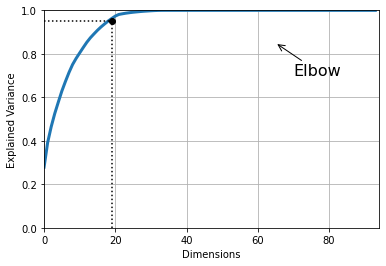

In [44]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 94, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
# save_fig("explained_variance_plot")
plt.show()

# try 8 dimensions

In [45]:
TruncSVD = TruncatedSVD(n_components=19)
X_reduced = TruncSVD.fit_transform(train_X_prepared)

## Train Model

## Bagging Classifier

### All Dimensions

In [62]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1,
    oob_score=True)

bag_clf.fit(train_X_prepared, train_y_md)

bag_clf.oob_score_

0.769605557055546

In [63]:
from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(train_X_prepared)
accuracy_score(train_y_md, y_pred)

0.7699369185832454

In [64]:
confusion_matrix(train_y_md, y_pred)

array([[15957, 13683],
       [ 5063, 46779]])

In [ ]:
# How to treat branch_id - should be discrete

# download docker container image with components needed
# set up conda environment, install rapids
# rapids.ai

### Reduced Dimensions

In [65]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1,
    oob_score=True)

bag_clf.fit(X_reduced, train_y_md)

bag_clf.oob_score_

0.6897719741783461

In [66]:
y_pred = bag_clf.predict(X_reduced)
accuracy_score(train_y_md, y_pred)

0.690716968164748

In [67]:
confusion_matrix(train_y_md, y_pred)

array([[ 8215, 21425],
       [ 3776, 48066]])

## AdaBoost

In [50]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
DecisionTreeClassifier(max_depth=5), n_estimators=200,
algorithm="SAMME.R", learning_rate=0.5)

ada_clf.fit(train_X_prepared, train_y_md)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.5, n_estimators=200)

In [52]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(ada_clf, train_X_prepared, train_y_md, cv = 3)

In [55]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_y_md, y_train_pred)

array([[17940, 11700],
       [ 7529, 44313]])

In [56]:
accuracy_score(train_y_md, y_train_pred)

0.7640092290321789

## Gradient Boost

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(train_X_prepared, train_y_md)

# gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=0.1)
# gbrt.fit(X, y)

In [59]:
from sklearn.metrics import accuracy_score

y_pred = gbrt.predict(train_X_prepared)
accuracy_score(train_y_md, y_pred)

0.7854740924375936

In [60]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(gbrt, train_X_prepared, train_y_md, cv = 3)

In [61]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_y_md, y_train_pred)

array([[17516, 12124],
       [ 5504, 46338]])